In [3]:
import os
import numpy as np
import time

In [5]:
def read_file(filename):
    buffer = ""
    with open(filename, 'r') as f:
        while True:
            line = f.readline()
            buffer += line
            if not line: break
    return buffer

In [8]:
dat = read_file("./log (16).csv")

In [9]:
lines = dat.split("\n")

In [10]:
heads = lines[0].split(",")[:-1]

In [12]:
data_line

In [13]:
data_mat = []
for line in lines[1:]:
    data_line = list(map(float, line.split(",")[:-1]))
    if len(data_line)>0:
        data_mat.append(data_line)
data_mat = np.array(data_mat)

In [14]:
data_mat.shape

(120000, 36)

In [15]:
import matplotlib.pyplot as plt

In [46]:
JOINT_DOF = 6

In [48]:
heads[0:JOINT_DOF], heads[JOINT_DOF:JOINT_DOF*2]

(['q0', 'q1', 'q2', 'q3', 'q4', 'q5'],
 ['qdot0', 'qdot1', 'qdot2', 'qdot3', 'qdot4', 'qdot5'])

In [49]:
heads[JOINT_DOF*2:JOINT_DOF*3], heads[JOINT_DOF*3:JOINT_DOF*4]

(['error0', 'error1', 'error2', 'error3', 'error4', 'error5'],
 ['e_nr0', 'e_nr1', 'e_nr2', 'e_nr3', 'e_nr4', 'e_nr5'])

In [70]:
# idx = np.arange(len(data_mat))
idx = np.arange(106215,106220)
q = data_mat[idx,0:JOINT_DOF]
e_dr = data_mat[idx,JOINT_DOF*2:JOINT_DOF*3]
e_nr = data_mat[idx,JOINT_DOF*3:JOINT_DOF*4]
e_dn = e_dr-e_nr
q_d = q+e_dr
q_n = q+e_nr

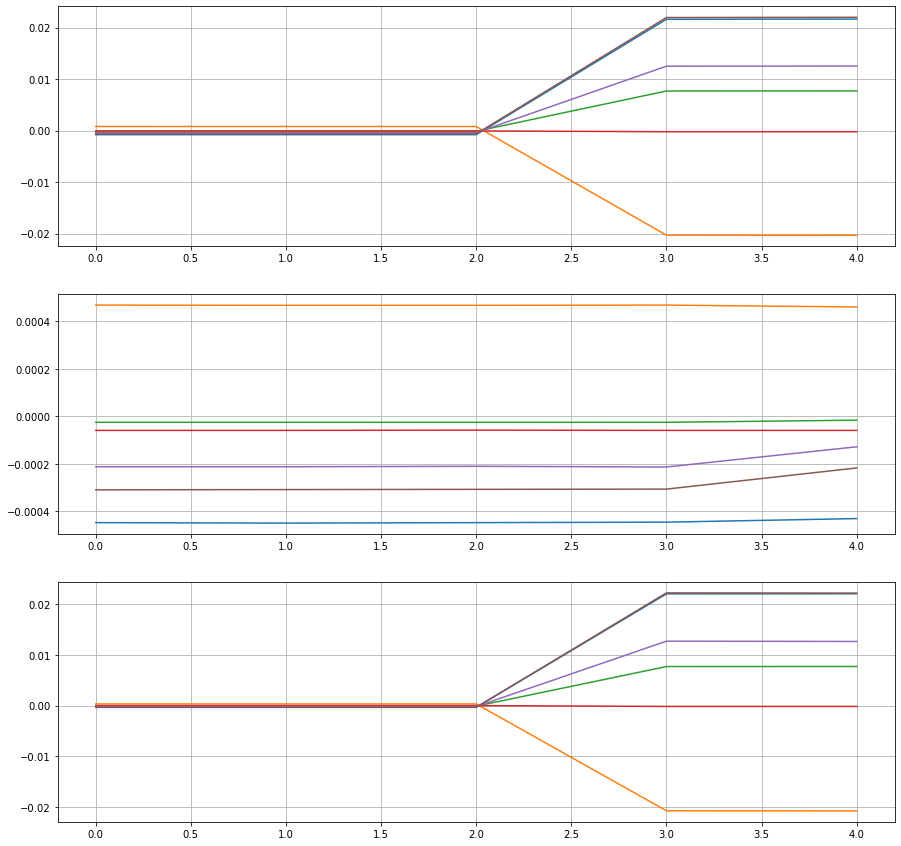

In [71]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(e_dr)
plt.grid()
plt.subplot(3,1,2)
plt.plot(e_nr)
plt.grid()
plt.subplot(3,1,3)
plt.plot(e_dn)
plt.grid()

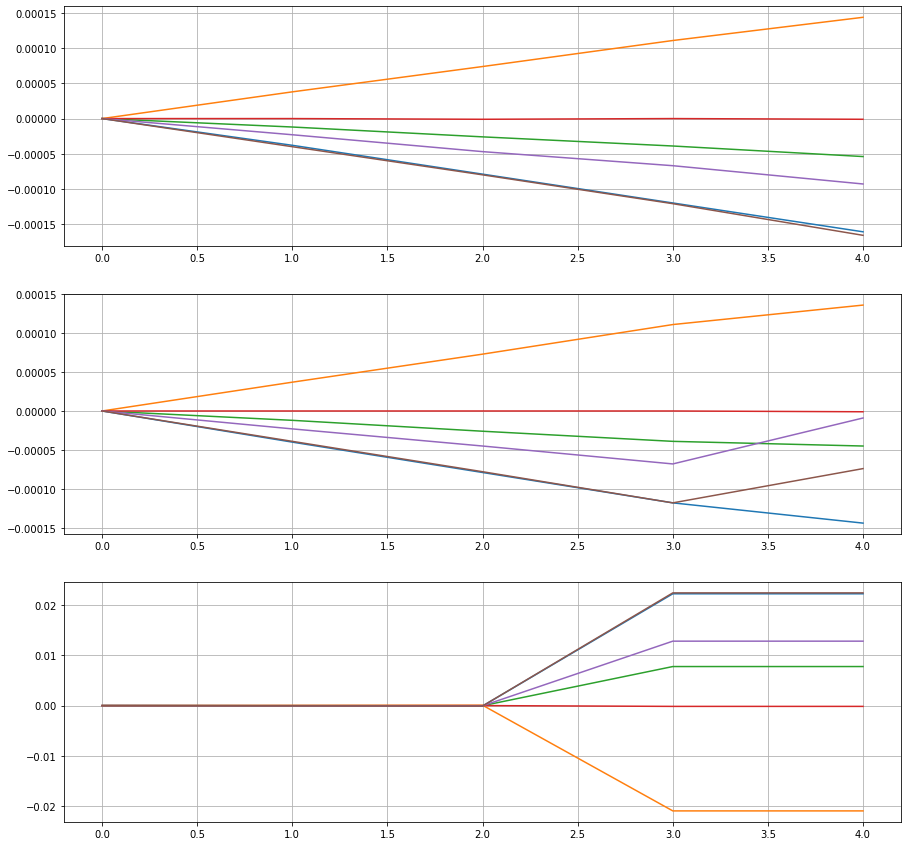

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(q-q[0:1,:])
plt.grid()
plt.subplot(3,1,2)
plt.plot(q_n-q_n[0:1,:])
plt.grid()
plt.subplot(3,1,3)
plt.plot(q_d-q_d[0:1,:])
plt.grid()

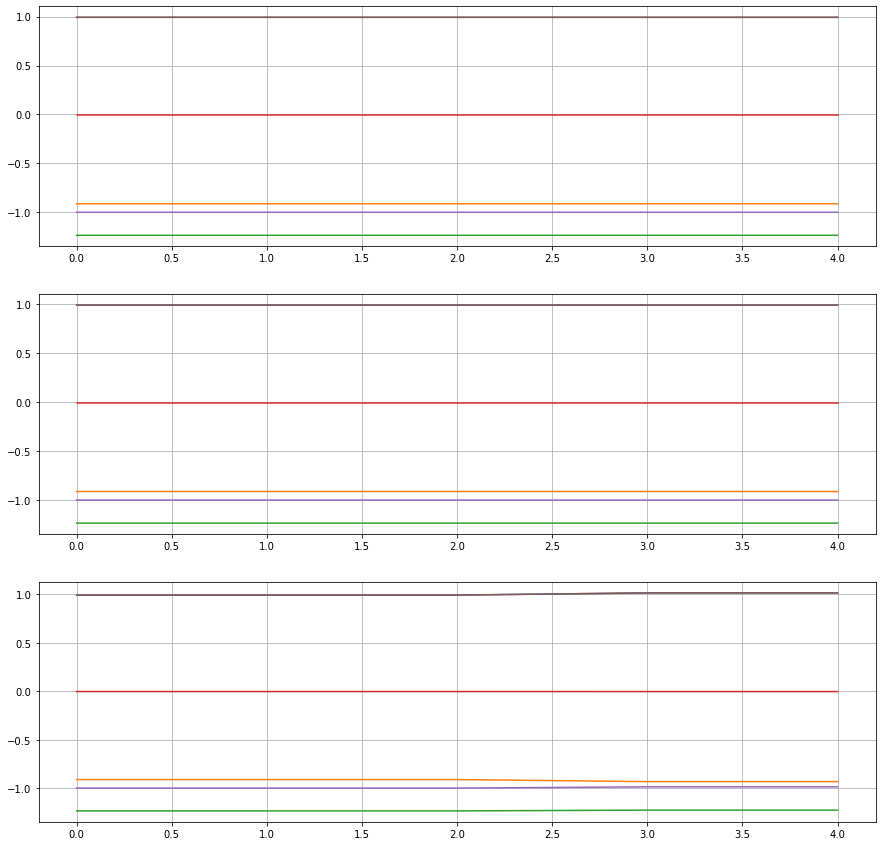

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(q)
plt.grid()
plt.subplot(3,1,2)
plt.plot(q_n)
plt.grid()
plt.subplot(3,1,3)
plt.plot(q_d)
plt.grid()